# Multiclass Classification
Classifying more-than-two labels/classes. Could be 3, could be 100.  
Steps:
- **get data ready** (create tensors from dataset)
- **build a model**: diy or pre-trained
- **fit the model** to the data, make predictions
- **evaluate the model**: how'd it do?
- **Experimentation**: do better
- **save & reload the model**

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Import Data: Fashion Items
60K items.  
28x28 images.  
[fashion_mnist dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(f'Training Data:\n{train_data[0]}')
print(f'Training Label:\n{train_labels[0]}')

Training Data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [6]:
print(f'data shape: {train_data[0].shape}')

data shape: (28, 28)


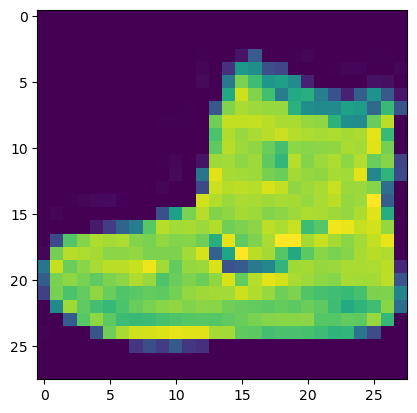

In [7]:
plt.imshow(train_data[0])

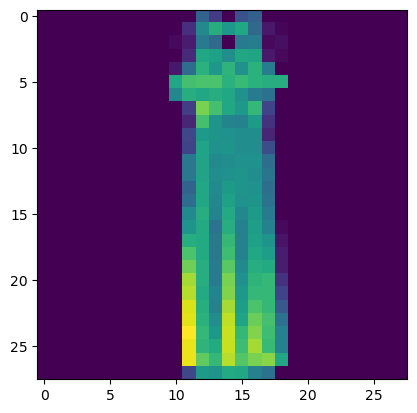

In [8]:
plt.imshow(train_data[250])

## Prep A Label-List
The labels can be found in the [readme](https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#labels)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
len(class_names)

10

## Visualize An Image And It's label

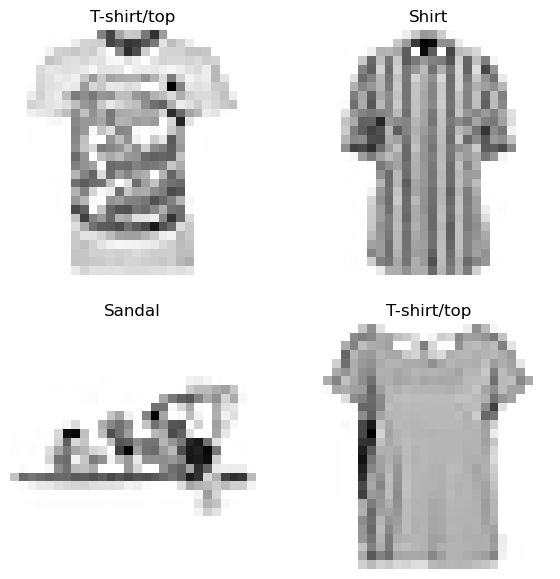

In [13]:
# 
# A SINGLE image
# 
 
# itm_idx = 122
# imgItm = train_data[itm_idx]
# labelItm = train_labels[itm_idx]
# label = class_names[labelItm]
# plt.imshow(imgItm, cmap=plt.cm.binary)
# plt.title(label)


# MULTIPLE
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)